In [1]:
import pandas as pd
from core_functions import *
import os
import warnings
warnings.filterwarnings('ignore')

Note before starting:
    <p>All data files must be in data/ folder<p>
    <p>All results will be generated in results/ folder <p>
    <p> All file names should be written between comma (e.g. 'filename')</p>

In [2]:
#File path of the functional database (it need to be in gmt format!)
#It should be in data/MSigDB/ file
db_name = '../data/MSigDB/go_mf.gmt'

#Filepath of the gene sets of interest to perform enrichment
filename = '../data/example_groups_file.xls'

#File path of the list of functional terms you do not want to display, by default none. 
filenameGO = 'No_file'

#Minimum of genes intersection your gene set and each pathway to consider the enrichment
#by default set to 0
mngene = 0

#Name of the analysis to be used for the term detail folder and summary excel
out_ex = 'example_output'

#Corrected P-value significance threshold
fs = 0.05

#Generate results folder if it is not already there
try:
    os.stat('../results/')
except:
    os.mkdir('../results/')       

## Functional enrichment

Working on.... cluster0
Working on.... cluster1
Working on.... cluster2
Working on.... cluster3
Working on.... cluster4
Working on.... cluster7
Working on.... cluster9


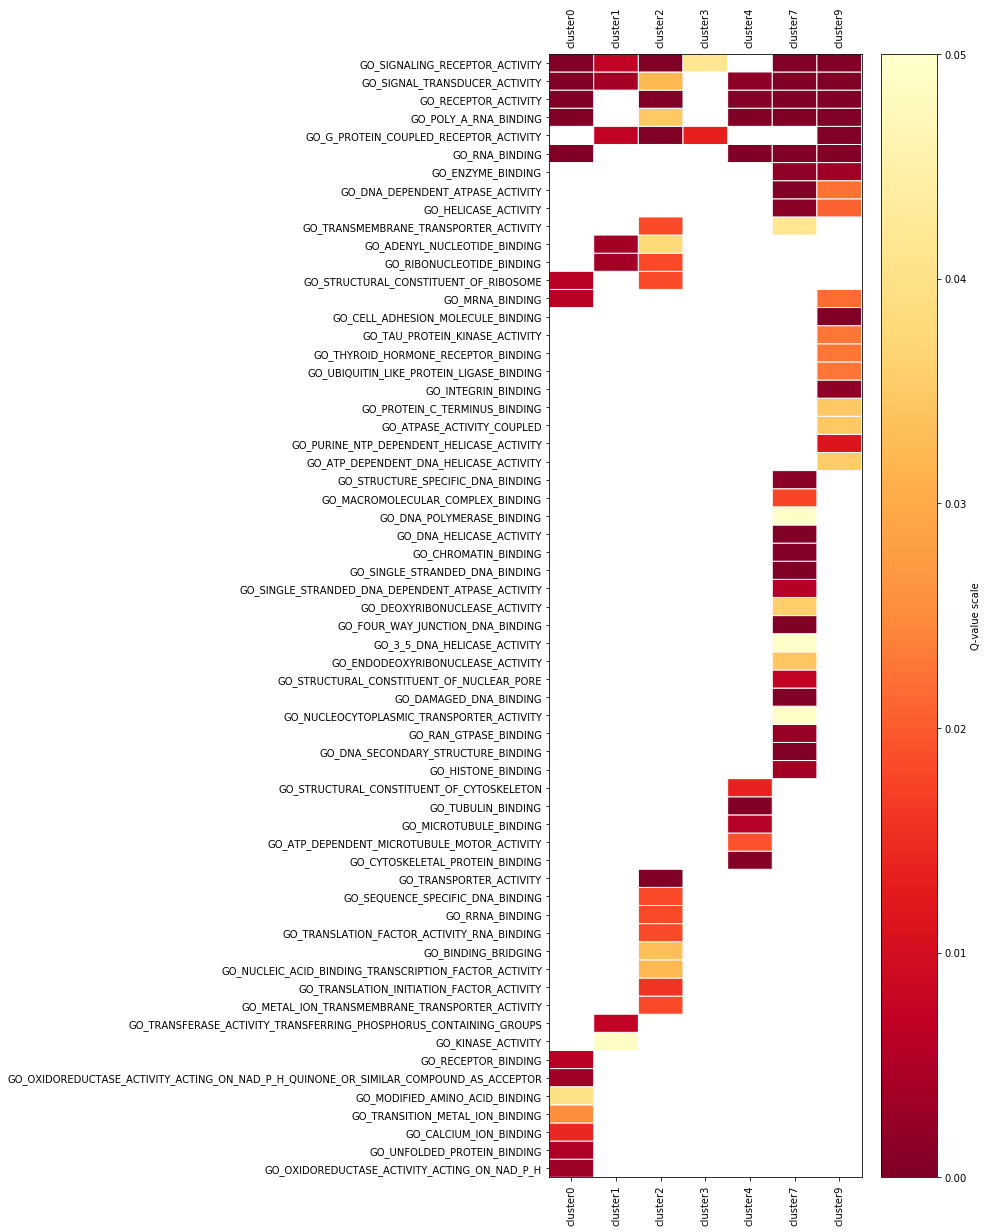

In [3]:
if filename == 'No_file':
    print('PLEASE SPECIFY A GROUP FILE. It should be in data/ folder')
else:
    #Load data
    clusters = pd.read_excel('../data/'+filename)
    cluster_genes = {}
    for cluster in clusters.columns.tolist():
        cluster_genes[cluster] = clusters[cluster].dropna().tolist()
    
    #Load functional annotation data
    genesets = {}
    allgenes = []
    ffile = open(db_name,'r')
    for line in ffile.readlines():
        f = line.strip().split('\t')
        genesets[f[0]] = f[2:]
        allgenes += f[2:]
    ffile.close()
    allgenes = set(allgenes)
    
    #Functional enrichment
    allenrichment_results = enrichment_all_groups(genesets,mngene,filenameGO,allgenes,cluster_genes,float(fs))
    
    if len(allenrichment_results) > 0:
        #Plot heatmap
        plot_heatmap(allenrichment_results,clusters,cluster_genes,float(fs))

        #Generate tabe with all results
        genes_enriched_per_group(allenrichment_results,out_ex)
        allenrichment_results[['GROUP','TERM','TERM_GENE_SET_SIZE','PVALUE','QVALUE','ENRICHED_GENES']].to_excel('../results/'+out_ex+'.xls',index=False)
    else:
        print('Any gene set from',dbn.value,'was enriched by',filename)

Explanation of the excel file generated
<li>GROUP: name of the user gene set of interest</li>
<li>TERM: pathway enriched</li>
<li>TERM_GENE_SET_SIZE: number of genes in pathway enriched</li>
<li>PVALUE: P-value of the enrichment</li>
<li>QVALUE: Corrected P-values (FDR bh) of the enrichment (the one to look at!)</li>
<li>ENRICHED_GENES: list of genes in the pathway and in the user gene set</li>